# Google problem и эргодическая теорема

Граф имеет
n
вершин. Если есть ребро то $p_{ij}>= 0$, иначе $p_{ij} = 0$. Сумма для каждой вершины равна 1. Запишем это в виде матрицы $P = ||p_{ij} ||$.

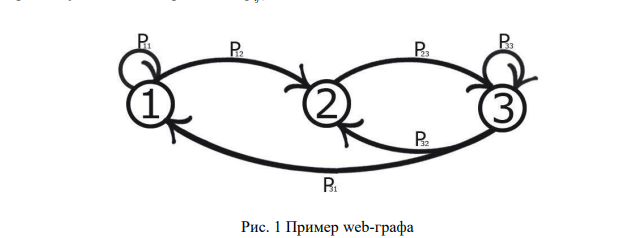

Запускаем гуся-работяги. Доли времени {$\nu_k$} таковы что $\sum \nu_i * p_{ij} = \nu_j$ с единственным решением в классе $\sum \nu_i  = 1$. $\nu$ - левый собственный вектор матрицы Р.

То есть город распадается на кластеры.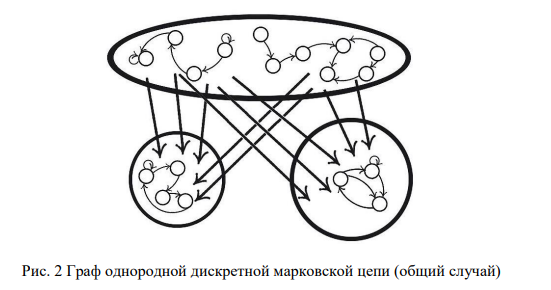

Причём важна существенность кластеров.

Получим уравнение Колмогорова–
Чэмпена (основное уравнение, описывающее дискретные однородные марковские цепи). $p_j (t+1) = ∑P(человек~ в~ момент~ t` находится ~в ~точке ~i)*P(~человек~ перешёл~ в~ район~ j,~ если~ он~ был~ в~ районе~ i). $

Матричный вид: $p^T (t+1) = p^T(t)P$. Если $\lim p(t) = \nu$ то $\nu^TP = \nu^T$ Существование предела критично, иначе 

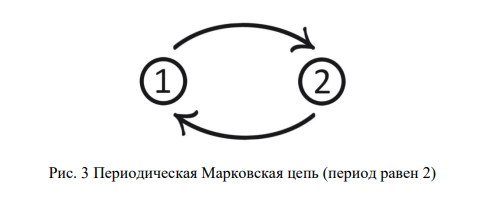

Условие “непериодичности” означает, что наибольший общий делитель последовательности длин всевозможных маршрутов (начинающихся и заканчивающихся на “Красной
площади”) равен 1.

Немного о том, как реально устроены поисковые системы и при чем
тут задача поиска вектора PageRank?


#Стандартные численные подходы к решению Google problem

Неявно описанный вектор PageRank, $\nu = \lim p(t)$. Возникает желание использовать легко программируемую процедуру (1) для приближенного расчета вектора PageRank.

Назовем спектральной щелью матрицы
P
наибольшее такое число
$ \alpha = 1 - | \beta| > 0$, $\beta$ и $∃~ \eta: \eta^TP = \beta \eta^T$. $\alpha - $расстояние между максимальным собственным значением матрицы P и следующим по величине модуля. Поэтому спектральная щель aka spectral gap.

Без вывода примем $||p(t) - \nu||_1 = def = \sum | p_k(t) - \nu_k | \leq C \cdot exp(-\alpha t/ \tilde C) $   

Cходимость $p^T (t+1) = p^T(t)P~~$   к   $~~\nu^TP = \nu^T$ называют эргодической теоремой. . Однако, на другой взгляд, сходимость процесса (1) – это скорее принцип
сжимающих отображений. Коэффициент
$\alpha$
как раз и характеризует степень сжатия, осуществляемого матрицей
P

Предположим сначала, что для рассматриваемого web-графа существует такая
web-страница, на которую есть ссылка из любой web-страницы в том числе из самой себя. Пусть на каждой ссылке вероятность не ниже $\gamma$, тогда в графе верно $\alpha \geq \gamma$. 

Усложним модель: с вероятностью $\delta$ случайно равновероятно выбирает среди
n
вершин одну, в которую и переходит. Введём квадратную матрицу Е размера n на n. Получим уравнение: $p^T(t+1) = p^T(t)((1-\delta)P + \delta E)$. А для искомого вектора: $\nu^T = nu^T((1- \delta)P + \delta E$, причём для $\delta$ от 0 до 1 уравнение имеет гарантированное решение. 

$\alpha \geq \delta$ На практике $\delta = 0.15$ 

Получается, что одна итерация (расчет
по формуле $p^T(t+1) = p^T(t)((1-\delta)P + \delta E)$) будет стоить
$3n^2$
арифметических операций (типа умножения чисел). Раскроем скобки: $p^T(t+1) = (1 - \delta)p^T(t)P + \delta (1/n,\cdots,1/n)$. Эта формула требует по порядку лишь
2sn
арифметических операций, где
s – среднее
число ненулевых элементов в строке матрицы
P. Для реального интернета $n \approx 10^{10};~ s << 10^4$

Алгоритм называется "Метод простой итерации" он же МПИ, при низких $\alpha $ не эффективен.

Сходимость зависит от $\alpha$, например при $\alpha = 0.15$ она очень быстрая. То есть взяв средний ноутбук, способный на $10^{10}$ операций в секунду, хотя на практике $10^8$, нужная точность получается на нескольких десятках итераций. "Стоимость" одной итерации по порядку 2sn$\leq 10^{13}$, то есть примерно за сутки такая программа считает Pagerank для всего интернета.

Проблемы: память.

Пусть $\alpha $ достаточно мал или у нас нет оценки снизу для быстрой сходимости МПИ. Решение предложено (Поляк-Тремба 2012) $|| P^T \bar p_T - \bar p_T||_1  \leq \frac{C}{T} = \frac{1}{T} \sum p(t)$, причём здесь не требуется условие "непериодичности", а также он не зависит от $\alpha$.  К сожалению, для наших целей: исследование степенного закона убывания компонент вектора PageRank метод Поляка–Трембы не подходит.

В МПИ мы можем обеспечить малость через $||p(t) - \nu||_1$, в данном методе $||\bar p_T - \nu || \approx C \epsilon / \alpha$, то есть оценка снова зависит от $\alpha$. Также другие методы поиска Pagerank, не использующие $\alpha$ на деле дают вектор $|| P^T \bar p_T - \bar p_T|| \approx \epsilon$. 

Тем не менее в задаче минимизации $|| P^T \bar p_T - \bar p_T||^b_l → min_{p \geq 0:~~ \sum p_k = 1}$ существуют достаточно эффективные решения. $|| P^T \bar p_T - \bar p_T||_2 \leq ϵ$ которое получается за $C\cdot (n+s^2\epsilon ^{-2} ln(n))$ 

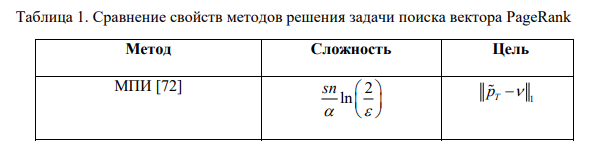

#Немного о том, как реально устроены поисковые системы 
и при чем
тут задача поиска вектора PageRank?

Может показаться, что в поисковой системе либо есть огромная база соответствий между запросами
q
и web-страницами
w. Эти соответствия выражаются векторами
«признаков»
y(q,w). Каждый элемент такого вектора
(признак) вычисляется как
мера обладания пары
(запрос, web-страница) некоторым, как правило, интуитивным
свойством
k. К таким свойствам, например, относят
“свежесть”, “соответствие тематике” 

Если задать некоторый запрос поисковой системе, то это еще не значит, что, во-первых,
в базе поисковой системы такой запрос имеется. Прежде всего, опишем модель, положенную в основу ранжирования.

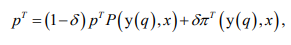

$x \in ℜ^d , d = 2l $ имеет порядок $ 10^3$. Решая систему выше получаем ранжирование. 

для запроса
$q \in Q$
известны некоторые компоненты “экспертного” вектора PageRank
$\nu^{exp} (q)$. Также дана мера несоответствия, сопоставляющая вектора p и v. Вектор параметров $x$ определяется из решения следующей задачи оптимизации: $F_Q(x) = \sum\mu (p(q,x), \nu^{exp}(q)) → min_{x\in R^d}$

Есть два различных сценария 1 и 2. Чтобы определиться с выбором сценария, множество
Q
разбивается на два подмножества
QL
(обучающее/Learning) и
QT
(контрольное/Test).   На выходе получаются векторы
$x^1, x^2$ Функции $P(y(q), x), π(y(q), x) , \mu(p,v)$ выбирают, чтобы задача была гладкой с липшицевым градиентом. $||\nabla F(y) - \nabla F(x)||_2 \leq L||y - x||_2$. Задача решается методом градиентного спуска: $x^{k+1} = x^k - \frac{1}{L} \nabla F(x^k)$. Или:

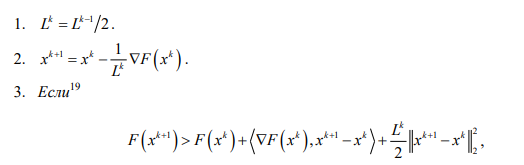

то $L^k := 2L^k $ и возвращение на шаг 2 иначе $k := k+1$. Среднее число вычислений градиента за итерацию $\leq 4$.

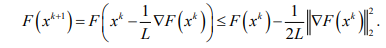

Критерия остановки метода: $|| \nabla F(x^k)||_2 \leq \epsilon$. Уменьшение за итерацию на $ϵ^2/(2L)$. Поэтому $N$ порядка $2L/ \epsilon^2$. Оценка неулучшаемая: $L/ ϵ^2$. Зависит только от $F(x^0) - F(x_*)$. МГС сходится к одному из экстремумов $F(x)$. Однако для поиска минимума есть нижняя оценка: $N$ порядка  $ϵ^{-(d-1)}$

Глобальный минимум не обязателен, если есть несколько локальных минимумов одной глубины, то это решение нас устроит.

Описанный выше подход (МГС и его адаптивный вариант) предполагает возможность
вычисления точного градиента
$\nabla F(x)$
. можно построить “обратный граф” вычисления
$\nabla F(x)$
за время не превышающее
4*
[время
расчета
$F(x)$
].  Соответствующая общая техника называется (быстрым) автоматическим дифференцированием (БАД). Якоби: $2d$*[время
расчета
$F(x)$
]. 

Путь неточного оракула: $(\tilde \delta, L)$ - оракул, возвращает, $F_{\tilde \delta}(x)~;~\nabla F_{\tilde \delta}(x)$

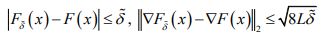

Запишем адаптивный МГС

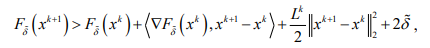

Критерий остановки: $|| \nabla F_{\tilde \delta} (x^k)|| \leq ϵ/2$ работает с оракулом выше. $N$ порядка $16L/ϵ^2$. Время работы оракула пропорционально $ln(\tilde \delta^{-1})$. Из-за завышенности теоретических оценок некоторые вычисения оказываются лишними можно делать рестарты по $ h:= h/2$

Оценим память одного запроса $sn \cdot (d+ ln(\epsilon^{-1})/ \delta) \geq 10^{13} \cdot 10^3 = 10^{16}$ или $10^4$ терабайт

ПГМС как решение: равновероятно и независимо от предыдущих розыгрышей выбрать $i_k \in [1, \cdots , n]$

$x^{k+1}_{i_k} = x^{k}_{i_k} = \frac{1}{L_{i_k}}\frac{dF(x^k)}{dx_{i_k}},~x_i^{k+1} =x_i^k; ~ i \neq i_k$

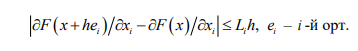
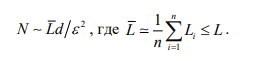

Теперь уже не нужно проверять на каждом шаге условие на точность, предлагается проверять каждые d итераций.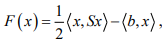


S – симметричная матрица, все элементы которой числа от 1 до 2. Тогда

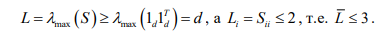

Если в функционале (18) очень много слагаемых и возможности распараллеливания вычислений ограничены, то использовать описанный выше МГС не разумно из-за огромных вычислительных затрат на каждой итерации. Для улучшения свойств решения задачи (18) можно вносить различные композиты в
функционал.

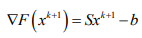
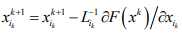

Если задача (рассматриваемая в гильбертовом пространстве)
оказывается выпуклой (
$\mu$ -сильно выпуклой), то можно говорить о поиске глобального минимума. на каждой итерации доступен оракул.

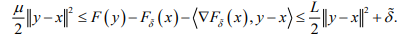

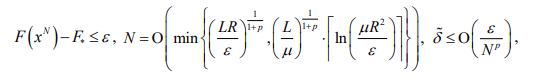

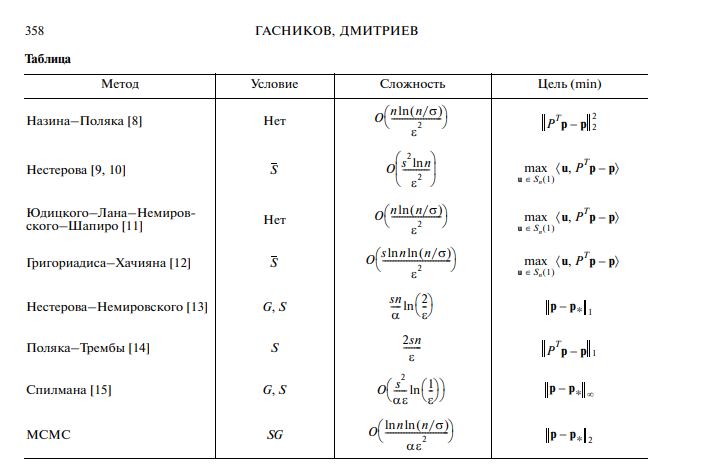

# Frank-wolf

Запишем задачу поиска PageRank $f(x) = \frac{1}{2} ||Ax||^2_2 \rightarrow min_{x \in S_n(1)}$. Метода ФВ - $x_1 - $ одна из вершин симлекса и она же точка  старта. 

Шаг индукции: $< \nabla f(x_k), y > → min_{y \in S_n (1) }$. Пусть $y_k = (0, 0...1...0)$ решение задачи, где 1 стоит на позиции $i_k = argmin_{i = 1...n} df(x_k)/dx^i$. 

Пусть $x_{k+1} = (1- \gamma_k)x_k + \gamma_k*y_k;~\gamma_k = \frac{2}{k+1} , k =1, 2\cdots$ Известна оценка $f(x_N) = f(x_N) - f_* \leq \frac{2L_p R^2_p}{N+1}$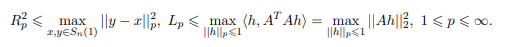

Для оптимизации на симплексе возьмём $p = 1$. $R^2_1 = 4$, $L_1 = max_{i = 1... n} || A^{<i>}||^2_2 \leq 2$. То есть для $f(x_N) \leq ϵ^2/2; N = 32ϵ^{-2}$.

Дополнительна за O(n) можно вычислить градиент и $argmin df(x_k)/dx^i; ~~O(s^2 ln(2+n/s^2)) $ - сложность итерации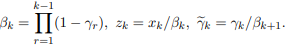

Тогда процесс примет вид: $z_{k+1} = z_k + \tilde \gamma_k y_k$. Вычислим $A^T Az_{k+1}~за~O(x^2 ln(2+n/s^2))~зная~A^TAz_k$. 

Тогда из задачи $i_{k+1} = argmin_{i = 1...n} df(x_{k+1})/dx^i => i_{k+1} = argmin_{i = 1...n}(A^TAz_{k+1})$ 

Из $z_N$ можно вычислить $x_N$ за $O(n +lnN) = O(n)$ Итоговая сложность $O(n+ \frac{s^2 ln(2 + n/s^2)}{ϵ^2})$

Наилучшая оценка на данный момент (без условий на спектральную щель) $O(n + s \cdot ln(n) ln(n/ σ)/ ϵ^2)$. Её можно улучшить для $||Ax||_{∞}$ так как она в корень из n раз меньше второй нормы.

# Markov Chain Monte Carlo и Google problem 


Основная идея, лежащая в основе подхода метода Монте-Карло заключается в практическом использовании эргодической теоремы

Если из вершины выходит не более чем $s << n$ рёбер, то можно за $sn$ операций подготовить память

МПИ позволяет при определённой задержке по времени получить нужную точность. То есть если мы за час получаем $10^{-3}$ то за 2 получим $10^{-6}$. Минус в
таком подходе – использование дополнительно памяти для хранения
 sn
чисел ну и, конечно, затратный препроцессинг. Ведь именно от этого мы и уходили, отказавшись от МПИ.

Каждый шаг выполняется за $log_2 s \leq log _2n$ арифметических операций.$log_2 s$ достигается методом Кнута-Яо. Для $T>> T_0 = ^{def} C \alpha^{-1} ln(m/ ϵ), \nu(T)$ – вектор
частот (случайный вектор) пребывания в различных вершинах блуждающего человечка после
 T
шагов. Тогда с вероятностью не меньше
$1 - σ$
(здесь и везде в дальнейшем
$\sigma \in (0,1)$ – произвольный доверительный уровень) имеет место неравенство

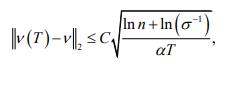


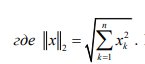

$||x||_{∞} = max|x_k|$

#Алгоритм МСМС

Переходные вероятно#
сти ищутся в следующем виде: $p_{ij} = p_{ij}^0b_{ij}; i \neq j ; p_{ii} = 1 -\sum p_{ij}$. Где $p^0_{ij}$некоторая “затравочная” матрица, которую будем далее предполагать симметричной. Проверим её стационарность меры: $\frac{b_{ij}}{b_{ji}} = \frac{\pi_i p^0_{ij}}{\pi_ip_{ij}^0} = \frac{\pi_j}{\pi_i}; ~p_{ij}^0 > 0$ Найдём $F(z)/F(1/z) = z;~b_{ij} = F(\frac{\pi_j p^0_{ij}}{\pi_i p^0_{ij}}) = F(\frac{\pi_j}{\pi_i})$.

Самый известный пример: $F(z) = min(1, z)$, другой $F(z) = z/(1+z)$. Обычно выбирают $p^0_{ij} = 1/M_i$ или $p^0_{ij} = 1/2 \cdot M_i$. $i \neq j~~p_{ij}^0 = 1/2, ~ i \neq j$

$\sum \pi_i p_{ij} = \pi_i \sum p_{ij} = \pi_j;~ j = 1, ...n$

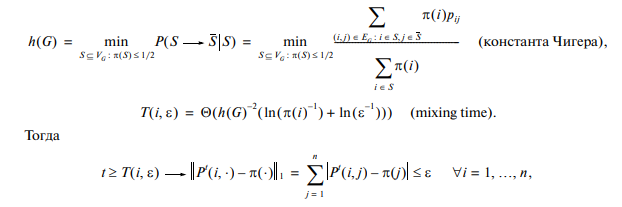

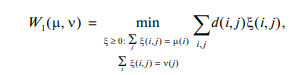

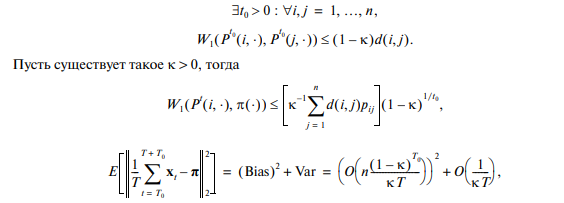

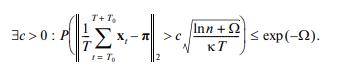

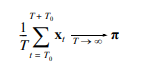

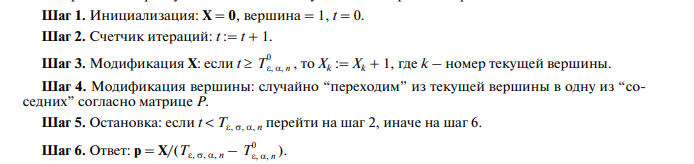

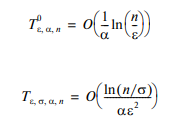

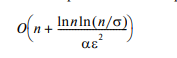

Несложно предложить способ эффективного распараллеливания такого алгоритма. Для этого
выпускается не одна траектория, а

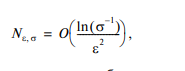

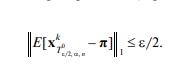

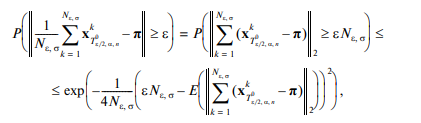

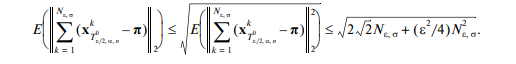

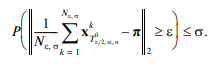

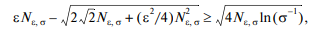

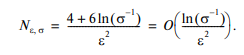

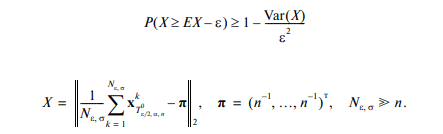

Основным недостатком метода MCMC является отсутствие точного знания о Tε, σ, α и ,
даже если известен размер спектральной щели

In [ ]:
#All required imports
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.optimize import minimize_scalar
import sys
import os
import random
from matplotlib import pyplot as plt

In [ ]:
#class 
class Graph(object):
    @staticmethod
    def preparation(path):
        cpy = "copy.txt"
        cpy = "modified_" + os.path.split(path)[-1]

        with open(path) as file, open(cpy, "w") as copy:
            # read header
            file.__next__()
            file.__next__()
            arr = file.__next__().split(" ")
            nodes, edges = arr[2], arr[4]
            file.__next__()
            copy.write(nodes + " " + edges)
            # copy main part

            lst = np.zeros(int(nodes))

            try:
                cnt = 1
                s = file.__next__()
                strings_to_write = [s.replace("\n", "")]
                src = s.split("\t")[0]

                while True:
                    s = file.__next__()
                    curr_src = s.split("\t")[0]

                    if curr_src == src:

                        cnt += 1
                        strings_to_write.append(s.replace("\n", ""))

                    else:

                        output = "".join(
                            ["".join(["\t", str(1 / cnt), "\n"]).join(strings_to_write), "\t", str(1 / cnt), "\n"])
                        copy.write(output)
                        strings_to_write = [s.replace("\n", "")]

                        lst[int(src)] = 1
                        src = s.split("\t")[0]
                        cnt = 1
            except StopIteration:
                pass
            # create "Google.com"
            for i in range(int(nodes)):
                if lst[i] == 0:
                    copy.write(str(i) + "\t" + "0" + "\t" + "1" + "\n")
                    
                    
    @staticmethod
    def preparation_stanford(path):
        cpy = "copy.txt"
        cpy = "modified_" + os.path.split(path)[-1]

        with open(path) as file, open(cpy, "w") as copy:
            # read header
            file.__next__()
            file.__next__()
            arr = file.__next__().split(" ")
            nodes, edges = arr[2], arr[4]
            file.__next__()
            copy.write(nodes + " " + edges)
            # copy main part

            lst = np.zeros(int(nodes))

            try:
                cnt = 1
                s = file.__next__()

                nd = s.replace("\n", "").split("\t")
                nd[0] = str(int(nd[0]) - 1)
                nd[1] = str(int(nd[1]) - 1)
                strings_to_write = ["\t".join(nd)]
                src = s.split("\t")[0]

                while True:
                    s = file.__next__()
                    curr_src = s.split("\t")[0]

                    if curr_src == src:

                        nd = s.split("\t")
                        nd[0] = str(int(nd[0]) - 1)
                        nd[1] = str(int(nd[1]) - 1)
                        if (int(nd[0]) > int(nodes)):
                            print(nd[0])
                        if (int(nd[1]) > int(nodes)):
                            print(nd[1])
                        s= "\t".join(nd)
                        cnt += 1
                        strings_to_write.append(s.replace("\n", ""))

                    else:

                        output = "".join(
                            ["".join(["\t", str(1 / cnt), "\n"]).join(strings_to_write), "\t", str(1 / cnt), "\n"])
                        copy.write(output)

                        nd = s.replace("\n", "").split("\t")
                        nd[0] = str(int(nd[0]) - 1)
                        nd[1] = str(int(nd[1]) - 1)
                        strings_to_write = ["\t".join(nd)]

                        lst[int(src) - 1] = 1
                        src = s.split("\t")[0]
                        cnt = 1
            except StopIteration:
                pass
            # create "Google.com"
            for i in range(int(nodes)):
                if lst[i] == 0:
                    copy.write(str(i) + "\t" + "0" + "\t" + "1" + "\n")

    def __init__(self, path: str):
        cpy = "copy.txt"
        with open(path) as file, open(cpy, "w") as copy:
            arr = file.__next__().split(" ")
            nodes, edges = int(arr[0]), int(arr[1].replace("\n", ""))
            try:
                while True:
                    copy.write(file.__next__())
            except StopIteration:
                pass

        arcgraph = pd.read_csv(cpy, header=None, names=["i", "j", "weight"], sep="\t")

        self.web_matr = csr_matrix((arcgraph["weight"], (arcgraph["i"], arcgraph["j"])),
                                   shape=(nodes, nodes)).transpose().tocsc()

        self.size = nodes

        os.remove(cpy)

In [ ]:
#prepare files
# Graph.preparation("web-NotreDame.txt")
# Graph.preparation_stanford("web-Stanford.txt")

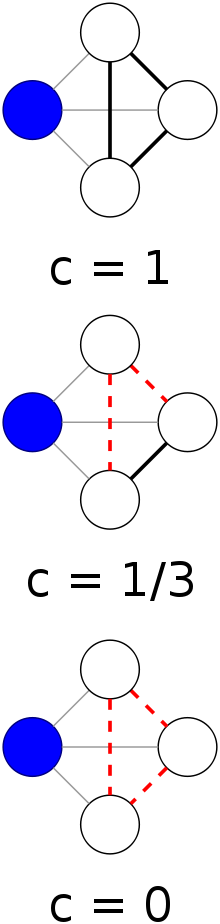

In [ ]:
def MSI(graph: Graph, accuracy):
    indexes = [i for i in range(graph.size)]

    teleport_coefficient = 0.15

    matrix = graph.web_matr * (1 - teleport_coefficient) + \
             csr_matrix((np.ones(graph.size), (indexes, indexes)),
                        shape=(graph.size, graph.size)) * teleport_coefficient

    iteration_number = 0

    current_vec = np.ones(graph.size) / graph.size

    tp_vec = np.ones(graph.size) / graph.size

    prev_vec = current_vec

    while True:

        iteration_number += 1

        current_vec = matrix.dot(prev_vec)

        if (np.linalg.norm(current_vec - prev_vec) < accuracy):
            return current_vec, iteration_number

        prev_vec = current_vec

In [ ]:
def Polyak_Tremba(graph: Graph, accuracy):
    indexes = [i for i in range(graph.size)]

    teleport_coefficient = 0.15

    matrix = graph.web_matr * (1 - teleport_coefficient) + \
             csr_matrix((np.ones(graph.size), (indexes, indexes)),
                        shape=(graph.size, graph.size)) * teleport_coefficient

    iteration_number = 0

    current_vec = np.ones(graph.size) / graph.size

    prev_vec = current_vec
    cumulative_sum_vec = np.zeros(graph.size)

    while True:
        iteration_number += 1

        current_vec = matrix.dot(prev_vec)
        cumulative_sum_vec += current_vec

        control_vec = cumulative_sum_vec / iteration_number
        if np.linalg.norm(matrix.dot(control_vec) - control_vec, ord=1) < accuracy:
            return control_vec, iteration_number

        prev_vec = current_vec

In [ ]:
def FrankWolf(graph: Graph, accuracy):
    # print("Frank-Wolf")
    indexes = np.array([i for i in range(graph.size)])
    operator = graph.web_matr - csr_matrix((np.ones(graph.size), (indexes, indexes)),
                                           shape=(graph.size, graph.size))

    func = lambda x: sum(map(lambda t: t ** 2, operator.dot(x))) * 0.5

    x_cur = np.ones(graph.size) / graph.size
    iteration_num = 0

    while True:
        iteration_num += 1

        y = np.zeros(graph.size)
        y[x_cur.argmin()] = 1

        x_prev = x_cur
        gamma = 2 / (iteration_num + 1)
        x_cur = (1 - gamma) * x_cur + gamma * y
        if abs(func(x_cur) - func(x_prev)) < accuracy:
            return x_cur, iteration_num

In [ ]:
def MonteCarlo(graph: Graph,  iterations=1000):
    matrix = graph.web_matr

    current_node = random.randint(0, graph.size - 1)

    iteration_num = 0
    vec = np.zeros(graph.size)

    for i in range(iterations):
        selection = np.array(matrix.getcol(current_node).nonzero()[0])
        rand = random.randint(0, len(selection) - 1)
        current_node = selection[rand]
        vec[current_node] += 1

        iteration_num += 1

    return vec / iteration_num

In [ ]:
#NotreDameWebGraph
graph = Graph("modified_web-NotreDame.txt")


MSI_resultsND = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
PT_resultsND = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
FW_resultsND = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
MC_resultsND = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}


for i in range(1, 7):
    accuracy = 10 ** (-i)

    MSI_vec, MSI_it = MSI(graph, accuracy)#7
    
    MSI_resultsND["Iterations"].append(MSI_it)
    MSI_resultsND["Norm_diff"].append(np.linalg.norm(MSI_vec - graph.web_matr.dot(MSI_vec)))
    MSI_resultsND["Accuracy"].append(i)


for i in range(1, 5):
    accuracy = 10 ** (-i)
    
    PT_vec,  PT_it= Polyak_Tremba(graph, accuracy)#5
    
    PT_resultsND["Iterations"].append(PT_it)
    PT_resultsND["Norm_diff"].append(np.linalg.norm(PT_vec - graph.web_matr.dot(PT_vec)))
    PT_resultsND["Accuracy"].append(i)
    

for i in range(1, 7):
    accuracy = 10 ** (-i)
    
    FW_vec, FW_it = FrankWolf(graph, accuracy)#5
    
    FW_resultsND["Iterations"].append(FW_it)
    FW_resultsND["Norm_diff"].append(np.linalg.norm(FW_vec - graph.web_matr.dot(FW_vec)))
    FW_resultsND["Accuracy"].append(i)
    
iterations = 100
while True:
    if iterations > 100000:
        break
    MC_vec = MonteCarlo(graph, iterations)
    MC_resultsND["Norm_diff"].append(np.linalg.norm(MC_vec - graph.web_matr.dot(MC_vec)))
    MC_resultsND["Iterations"].append(iterations)
    iterations *= 10
    

In [ ]:
#StanfordWebGraph
graph = Graph("modified_web-Stanford.txt")


MSI_results_Stanf = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
PT_results_Stanf = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
FW_results_Stanf = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}
MC_results_Stanf = {"Iterations" : [], "Accuracy" : [],  "Norm_diff" : []}


for i in range(1, 7):
    accuracy = 10 ** (-i)

    MSI_vec, MSI_it = MSI(graph, accuracy)#7
    
    MSI_results_Stanf["Iterations"].append(MSI_it)
    MSI_results_Stanf["Norm_diff"].append(np.linalg.norm(MSI_vec - graph.web_matr.dot(MSI_vec)))
    MSI_results_Stanf["Accuracy"].append(i)


for i in range(1, 5):
    accuracy = 10 ** (-i)
    
    PT_vec,  PT_it= Polyak_Tremba(graph, accuracy)#5
    
    PT_results_Stanf["Iterations"].append(PT_it)
    PT_results_Stanf["Norm_diff"].append(np.linalg.norm(PT_vec - graph.web_matr.dot(PT_vec)))
    PT_results_Stanf["Accuracy"].append(i)
    

for i in range(1, 7):
    accuracy = 10 ** (-i)
    
    FW_vec, FW_it = FrankWolf(graph, accuracy)#5
    
    FW_results_Stanf["Iterations"].append(FW_it)
    FW_results_Stanf["Norm_diff"].append(np.linalg.norm(FW_vec - graph.web_matr.dot(FW_vec)))
    FW_results_Stanf["Accuracy"].append(i)
    
    
iterations = 100
while True:
    if iterations > 100000:
        break
    MC_vec = MonteCarlo(graph, iterations)
    MC_results_Stanf["Norm_diff"].append(np.linalg.norm(MC_vec - graph.web_matr.dot(MC_vec)))
    MC_results_Stanf["Iterations"].append(iterations)
    iterations *= 10
    

In [ ]:
# print(MSI_resultsND)
# print(PT_resultsND)
# print(FW_resultsND)
# print(MSI_results_Stanf)
# print(PT_results_Stanf)
# print(FW_results_Stanf)

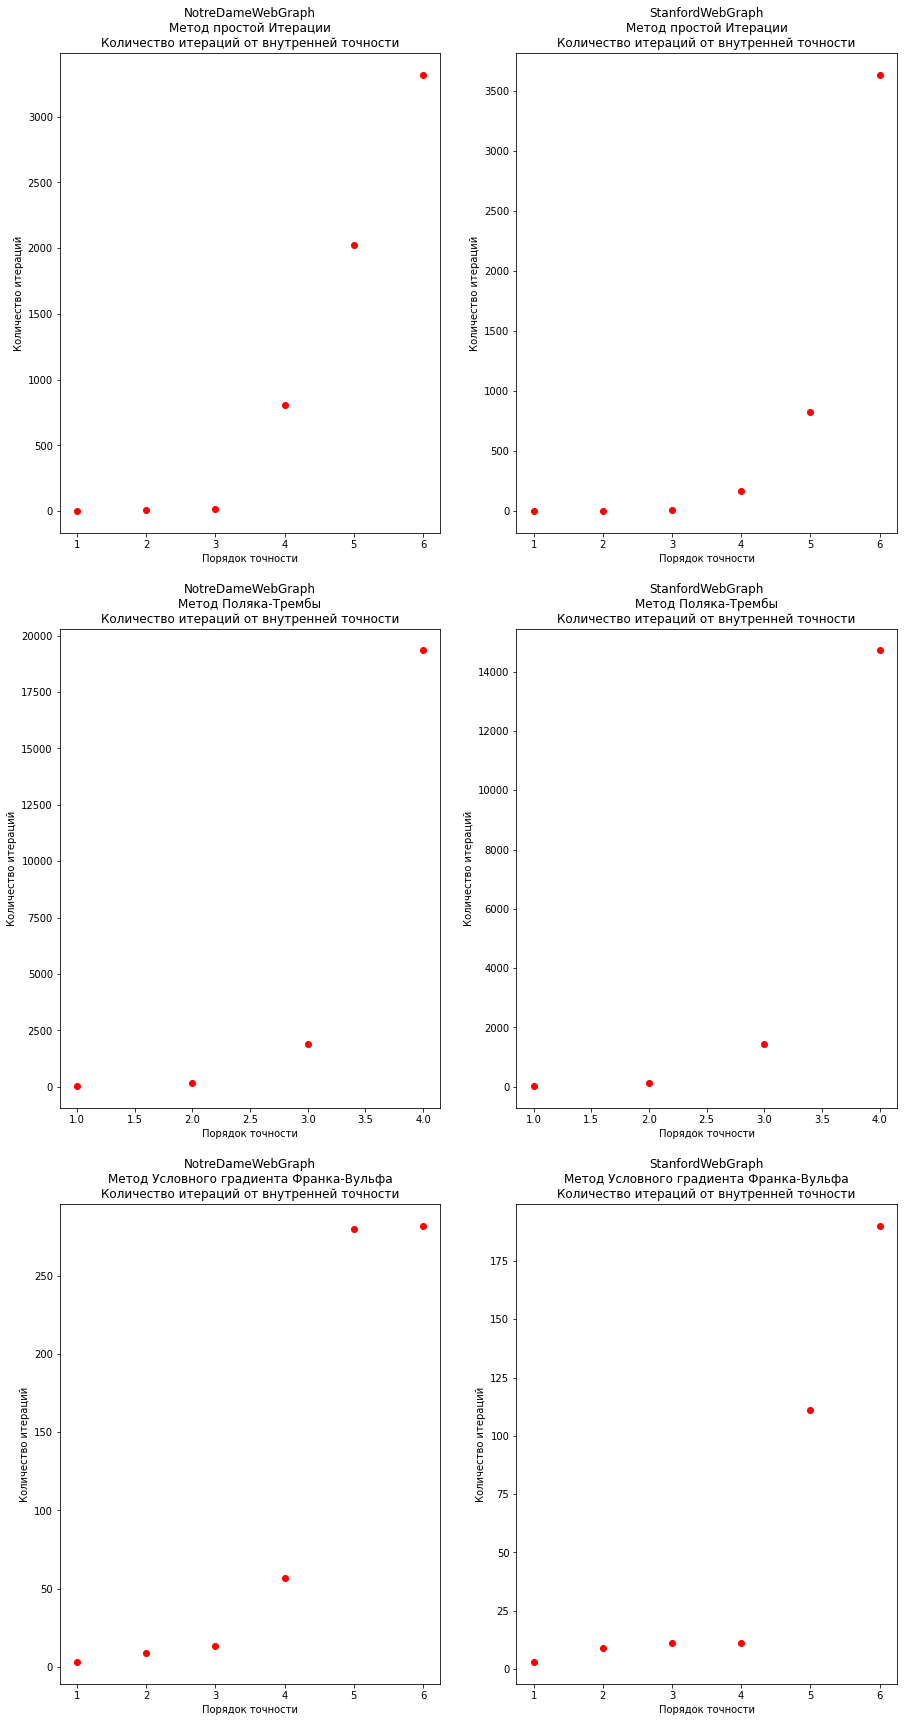

In [ ]:
#Количество итераций от точности
fig, axes = plt.subplots(3, 2, figsize = (15,30))

axes[0][0].set_title("NotreDameWebGraph\nМетод простой Итерации\nКоличество итераций от внутренней точности")
axes[1][0].set_title("NotreDameWebGraph\nМетод Поляка-Трембы\nКоличество итераций от внутренней точности")
axes[2][0].set_title("NotreDameWebGraph\nМетод Условного градиента Франка-Вульфа\nКоличество итераций от внутренней точности")

axes[0][1].set_title("StanfordWebGraph\nМетод простой Итерации\nКоличество итераций от внутренней точности")
axes[1][1].set_title("StanfordWebGraph\nМетод Поляка-Трембы\nКоличество итераций от внутренней точности")
axes[2][1].set_title("StanfordWebGraph\nМетод Условного градиента Франка-Вульфа\nКоличество итераций от внутренней точности")


[axes[i][j].set_xlabel("Порядок точности") for i in range(3) for j in range(2)]
[axes[i][j].set_ylabel("Количество итераций") for i in range(3) for j in range(2)]

axes[0][0].plot(MSI_resultsND["Accuracy"], MSI_resultsND["Iterations"], "ro")
axes[1][0].plot(PT_resultsND["Accuracy"], PT_resultsND["Iterations"], "ro")
axes[2][0].plot(FW_resultsND["Accuracy"], FW_resultsND["Iterations"], "ro")

axes[0][1].plot(MSI_results_Stanf["Accuracy"], MSI_results_Stanf["Iterations"], "ro")
axes[1][1].plot(PT_results_Stanf["Accuracy"], PT_results_Stanf["Iterations"], "ro")
axes[2][1].plot(FW_results_Stanf["Accuracy"], FW_results_Stanf["Iterations"], "ro")

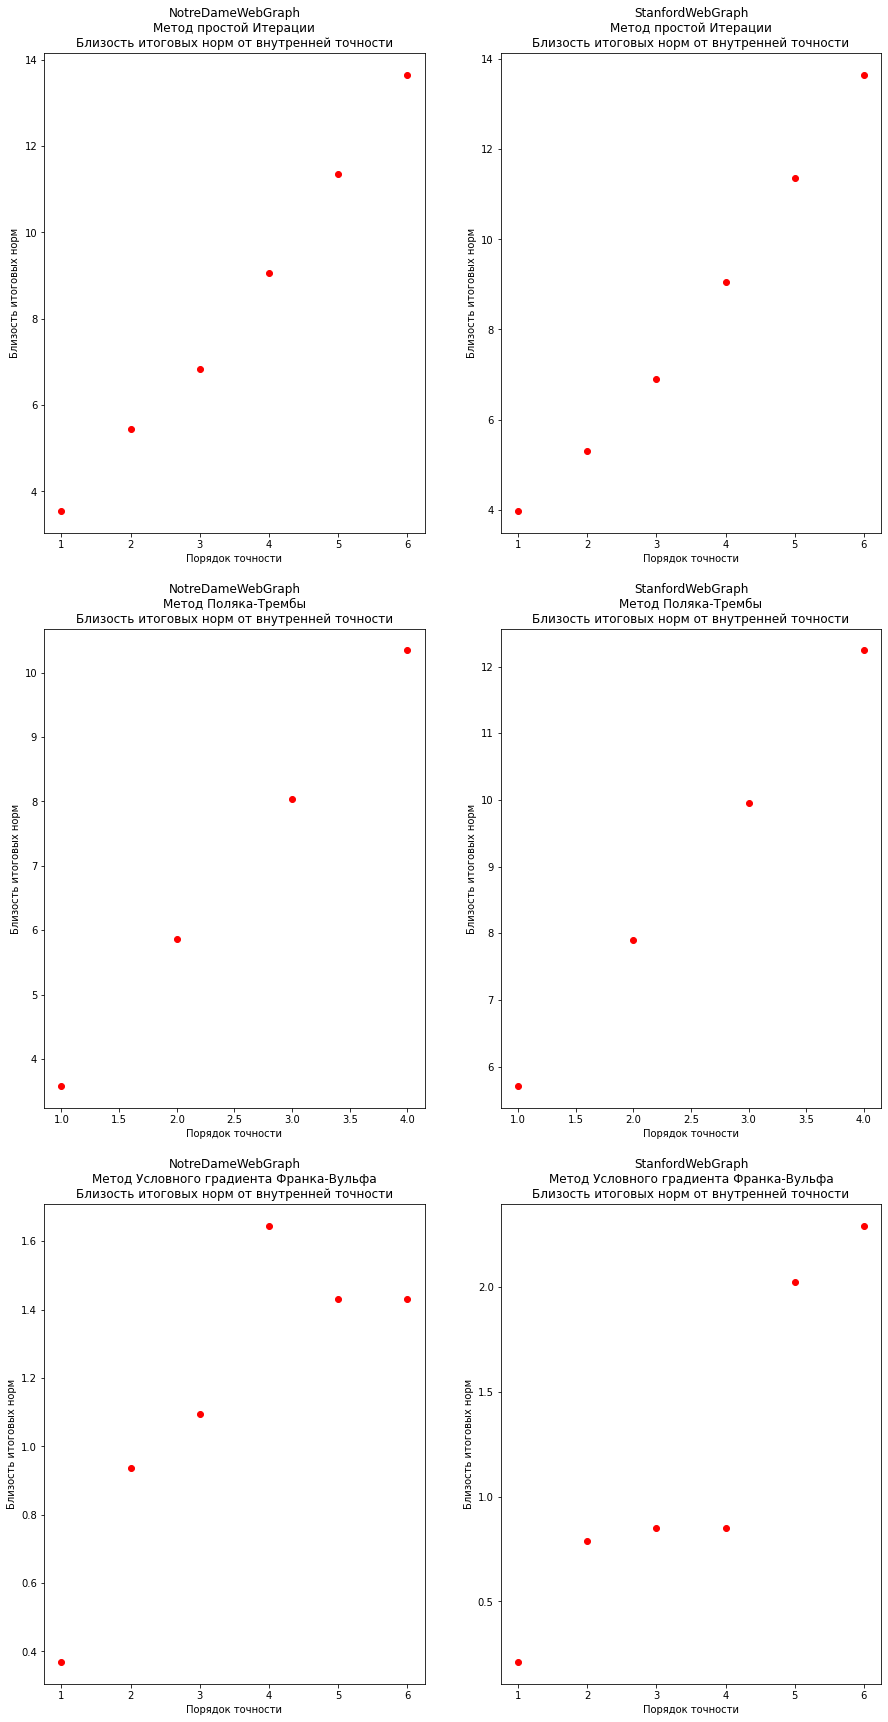

In [ ]:
#Близость итоговых норм от внутренней точности
fig, axes = plt.subplots(3, 2, figsize = (15,30))

axes[0][0].set_title("NotreDameWebGraph\nМетод простой Итерации\nБлизость итоговых норм от внутренней точности")
axes[1][0].set_title("NotreDameWebGraph\nМетод Поляка-Трембы\nБлизость итоговых норм от внутренней точности")
axes[2][0].set_title("NotreDameWebGraph\nМетод Условного градиента Франка-Вульфа\nБлизость итоговых норм от внутренней точности")

axes[0][1].set_title("StanfordWebGraph\nМетод простой Итерации\nБлизость итоговых норм от внутренней точности")
axes[1][1].set_title("StanfordWebGraph\nМетод Поляка-Трембы\nБлизость итоговых норм от внутренней точности")
axes[2][1].set_title("StanfordWebGraph\nМетод Условного градиента Франка-Вульфа\nБлизость итоговых норм от внутренней точности")


[axes[i][j].set_xlabel("Порядок точности") for i in range(3) for j in range(2)]
[axes[i][j].set_ylabel("Близость итоговых норм") for i in range(3) for j in range(2)]

axes[0][0].plot(MSI_resultsND["Accuracy"], [np.log(1/i) for i in MSI_resultsND["Norm_diff"]], "ro")
axes[1][0].plot(PT_resultsND["Accuracy"], [np.log(1/i) for i in PT_resultsND["Norm_diff"]], "ro")
axes[2][0].plot(FW_resultsND["Accuracy"], [np.log(1/i) for i in FW_resultsND["Norm_diff"]], "ro")

axes[0][1].plot(MSI_results_Stanf["Accuracy"], [np.log(1/i) for i in MSI_results_Stanf["Norm_diff"]], "ro")
axes[1][1].plot(PT_results_Stanf["Accuracy"], [np.log(1/i) for i in PT_results_Stanf["Norm_diff"]], "ro")
axes[2][1].plot(FW_results_Stanf["Accuracy"], [np.log(1/i) for i in FW_results_Stanf["Norm_diff"]], "ro")

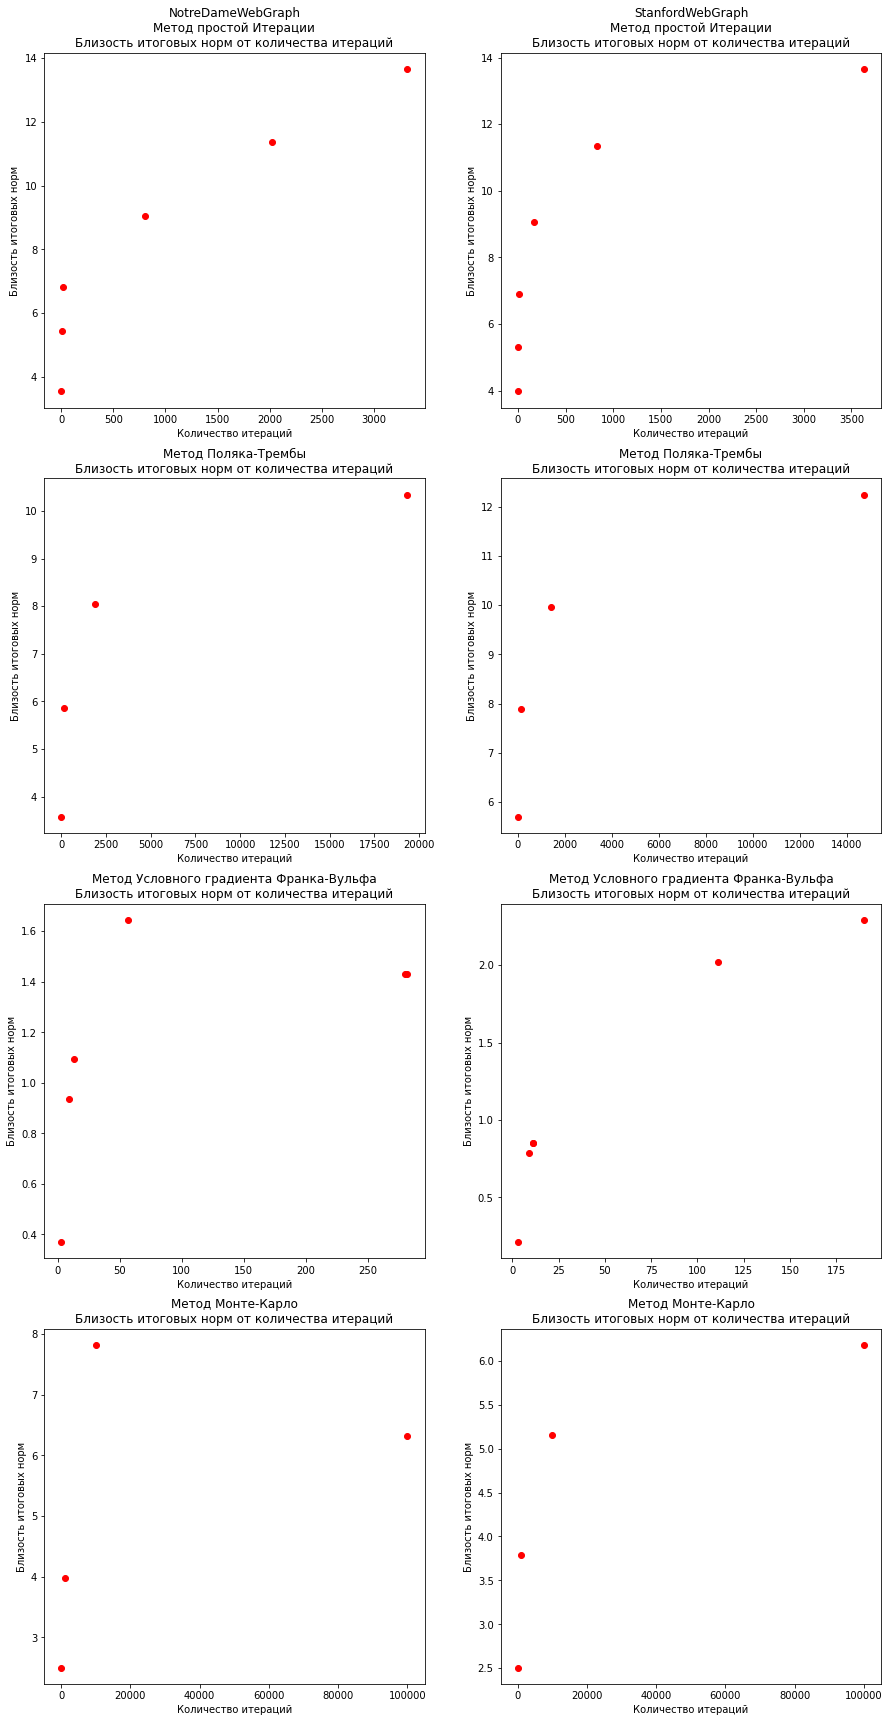

In [ ]:
#Точность от количества итераций
#Близость итоговых норм от внутренней точности
fig, axes = plt.subplots(4, 2, figsize = (15,30))

axes[0][0].set_title("NotreDameWebGraph\nМетод простой Итерации\nБлизость итоговых норм от количества итераций")
axes[1][0].set_title("Метод Поляка-Трембы\nБлизость итоговых норм от количества итераций")
axes[2][0].set_title("Метод Условного градиента Франка-Вульфа\nБлизость итоговых норм от количества итераций")
axes[3][0].set_title("Метод Монте-Карло\nБлизость итоговых норм от количества итераций")

axes[0][1].set_title("StanfordWebGraph\nМетод простой Итерации\nБлизость итоговых норм от количества итераций")
axes[1][1].set_title("Метод Поляка-Трембы\nБлизость итоговых норм от количества итераций")
axes[2][1].set_title("Метод Условного градиента Франка-Вульфа\nБлизость итоговых норм от количества итераций")
axes[3][1].set_title("Метод Монте-Карло\nБлизость итоговых норм от количества итераций")


[axes[i][j].set_xlabel("Количество итераций") for i in range(4) for j in range(2)]
[axes[i][j].set_ylabel("Близость итоговых норм") for i in range(4) for j in range(2)]

axes[0][0].plot(MSI_resultsND["Iterations"], [np.log(1/i) for i in MSI_resultsND["Norm_diff"]], "ro")
axes[1][0].plot(PT_resultsND["Iterations"], [np.log(1/i) for i in PT_resultsND["Norm_diff"]], "ro")
axes[2][0].plot(FW_resultsND["Iterations"], [np.log(1/i) for i in FW_resultsND["Norm_diff"]], "ro")
axes[3][0].plot(MC_resultsND["Iterations"], [np.log(1/i) for i in MC_resultsND["Norm_diff"]], "ro")

axes[0][1].plot(MSI_results_Stanf["Iterations"], [np.log(1/i) for i in MSI_results_Stanf["Norm_diff"]], "ro")
axes[1][1].plot(PT_results_Stanf["Iterations"], [np.log(1/i) for i in PT_results_Stanf["Norm_diff"]], "ro")
axes[2][1].plot(FW_results_Stanf["Iterations"], [np.log(1/i) for i in FW_results_Stanf["Norm_diff"]], "ro")
axes[3][1].plot(MC_results_Stanf["Iterations"], [np.log(1/i) for i in MC_results_Stanf["Norm_diff"]], "ro")

In [ ]:
print(MC_results_Stanf)
print(MC_resultsND)

{'Iterations': [100, 1000, 10000, 100000], 'Accuracy': [], 'Norm_diff': [0.08153393902819893, 0.02260388221420328, 0.005780393809549526, 0.002080496735557805]}
{'Iterations': [100, 1000, 10000, 100000], 'Accuracy': [], 'Norm_diff': [0.08197525554539853, 0.018823699976977283, 0.00040406667735700996, 0.0017905485332307485]}
